<a href="https://colab.research.google.com/github/cmgospod/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [12]:
def meanvariancestdev(numbers):
  mean = sum(numbers) / len(numbers)
  devlist = []
  for number in numbers:
    devlist.append((number - mean)**2)
  variance = sum(devlist)
  stdev = variance**0.5
  return [mean, variance, stdev]
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
answer = meanvariancestdev(sales)
print(answer)

[3052.714285714286, 1286327.4285714284, 1134.1637573875425]


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [17]:
import numpy as np
traffic = [127,80,105,92,120,115,93]
cov = np.cov(sales, traffic)
answer2 = cov[0,1]
answer2

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [18]:
answer3 = meanvariancestdev(traffic)
coefficient = answer2 / (answer[2]*answer3[2])
coefficient

0.16047232963581515

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [28]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',index_col=[0], usecols=[0, 1, 2, 5, 6, 7, 9, 15])
df.dtypes

pclass              float64
survived            float64
age                 float64
sibsp               float64
parch               float64
fare                float64
has_cabin_number      int64
dtype: object

In [29]:
df.isnull().sum()

pclass              1
survived            1
age                 0
sibsp               1
parch               1
fare                2
has_cabin_number    0
dtype: int64

In [0]:
df = df.dropna()

In [32]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


In [33]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

<function matplotlib.pyplot.show>

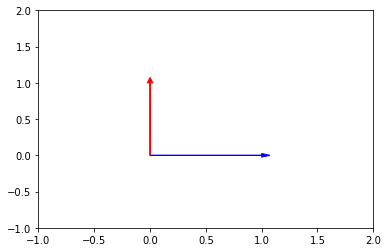

In [42]:
import matplotlib.pyplot as plt
plt.arrow(0,0,0,1, head_width=0.05, color='r')
plt.arrow(0,0,1,0, head_width=0.05, color='b')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show
# Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# a * b = (-5*6) + (3*-8) + (7*2) = -30 + -24 + 14 = -40
# No, because the dot product is not zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [43]:
2**2 + 15**2 + 6**2 + 20**2

665

In [44]:
2*2 + -15*-15 + 6*6 + 20*20

665

In [45]:
cee = [2,-15,6,20]
np.matmul(cee,cee)
# They definitely have something in common, but I just can't put my finger on it :P

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [51]:
norm = (4 + 121 + 64)**0.5
print(norm)
print(2/norm)
print(11/norm)
print(-8/norm)

13.74772708486752
0.14547859349066158
0.8001322641986387
-0.5819143739626463


\begin{align}
d = \sqrt{193} \begin{bmatrix} 7 \\ \sqrt{193} \\\\ 12 \\ \sqrt{193} \end{bmatrix}
\qquad
e = 13.7477\begin{bmatrix} 0.1455 \\ 0.8001 \\ -0.5819  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [54]:
norm = (16 + 144 + 121 + 81 + 4)**0.5
print([4/norm,12/norm,11/norm,9/norm,2/norm])

[0.20908334939572668, 0.62725004818718, 0.5749792108382483, 0.470437536140385, 0.10454167469786334]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

<function matplotlib.pyplot.show>

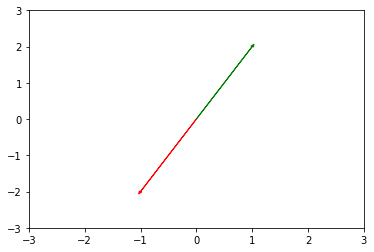

In [58]:
plt.arrow(0,0,1,2, head_width = 0.05, color = 'g')
plt.arrow(0,0,-1,-2, head_width = 0.05, color = 'r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show

<function matplotlib.pyplot.show>

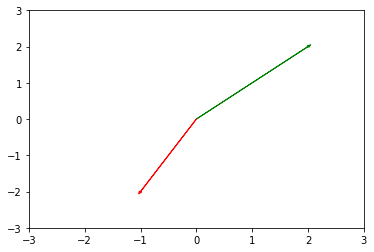

In [59]:
plt.arrow(0,0,2,2, head_width = 0.05, color = 'g')
plt.arrow(0,0,-1,-2, head_width = 0.05, color = 'r')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The line y = 2x

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# All of R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



<function matplotlib.pyplot.show>

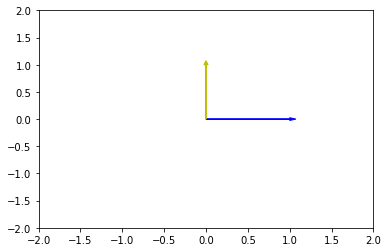

In [62]:
plt.arrow(0,0,1,0, head_width = 0.05, color = 'b')
plt.arrow(0,0,0,1, head_width = 0.05, color = 'y')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show

## 6.2 What does it mean to form a basis?

For vectors to form a basis for a space, they must be able to represent any vector in that space through linear combination.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the number of dimensions it can span

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [71]:
v = [1,3] 
w = [-1,2]
proj = (np.dot(w,v)/np.dot(v,v))
projl = np.multiply(proj,v)
projl

array([0.5, 1.5])

(-5, 5)

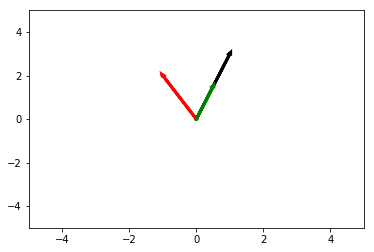

In [72]:

plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05)
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, color ='red')
plt.arrow(0, 0, projl[0], projl[1], linewidth=3, head_width=.05, color = 'green')
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

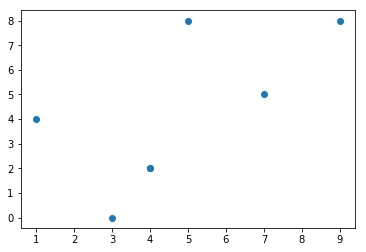

In [73]:
# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()